<a id='top'></a>

# Homework 2: Introduction to Probability and Simulation 
***

**Name**: Aaron Li

***

This assignment is due on Canvas by **5 PM on Friday February 15**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4)

---

In [103]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pylab as plt
import scipy as stats
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

### [30 points] Problem 1

Courtney, Nick and Jarrod are playing special version of <a href="https://en.wikipedia.org/wiki/Monopoly_(game)">Monopoly</a>. Because the three of them are all scoundrels, they are all currently in Jail. In Monopoly, players roll two 6-sided dice on their turn. In their version of Monopoly, however, to get out of Jail, a player must roll *doubles* (the two dice have the same outcome) and must keep re-rolling the dice until they get doubles during their first turn in Jail. As soon as a player rolls doubles, they are let out of Jail and their turn ends. Let $D$ represent the event that a player rolls doubles.

Work the following problems by hand unless otherwise stated (but don't be afraid to simulate to check your result!). It is okay to use Python as a calculator, of course.

**Part A**: What is the probability that a player will roll doubles on their first, second, or third roll while in jail? Note that if a player rolls doubles on their third roll, for example, then they must *not* have rolled doubles on either of the first two rolls. Keep 4 decimal places in your answer.

Probability of rolling double= $P_d=\frac{1}{6}$ not double $P_{not}=\frac{5}{6}$. 
so the total probablity is $P_{tot}=P_d+P_{not}*P_d+P_{not}^2*P_d=.4213$ or $42.13\%$ chance

**Part B:** *The plot thickens!* Darth Ketelsen is well-known to meddle in Jedi affairs. Did I mention that Courtney, Nick and Jarrod are all in Computer Science Jedi training? That's not important for this problem, but it is interesting. 

Turns out, Darth Ketelsen will occasionally secretly swap out the dice in the Jedi's Monopoly game for a pair of dice that have been weighted. Each of Darth Ketelsen's two dice is weighted such that a 6 is rolled with probability $1/2$, and all the other numbers are equally likely to be rolled. If Darth Ketelsen switches the dice for her weighted ones, she does so before the game begins, and the entire game of Monopoly is played with the same pair of dice, whether they are fair or weighted.

What is the probability of rolling doubles on the first, second or third roll while in jail, using Darth Ketelsen's weighted dice? Again, keep 4 decimal places in your answer.

Probability of rolling 6 is $\frac{1}{2}$ probability of rolling number other than 6 is $P_{not6}=\frac{1}{10}$
therefore, probiblity of rolling doubles is $P_d=P_{6}+P_{not6}=.3$ and $P_{not}=.7$  so total probability is $P_{tot}=P_d+P_{not}*P_d+P_{not}^2*P_d=.657$ or $65.7\%$ chance

**Part C:** Suppose that before any given game of Monopoly, Darth Ketelsen replaces the normal six-sided dice with her loaded dice with probability $0.25$. Then the players proceed to play their entire game using either the loaded dice, or the fair dice.  It is unknown to the player who is rolling, however, whether they are using the unfair or fair dice. What is the probability that a player gets doubles within three rolls? Keep 4 decimal places in your answer.

$P_L=.25$ and $P_{NL}=.75$ so total probability is $P_L*.657+P_{NL}*.4213=.4802$

**Part D:** While it is unknown whether they are playing with Darth Ketelsen's unfair dice, or with fair dice, Courtney, Jarrod and Nick are armed and dangerous... with *probability theory*, that is! Well, probability theory and lightsabers.

Suppose that starting from jail, all three of Courtney, Jarrod and Nick have taken one turn, and all three of them have managed to roll doubles within 3 rolls. If you were not given this information, you would assume that there is a probability of $0.25$ that they are playing with Darth Ketelsen's unfair dice. But now, given this information, what is the probability that they are playing with the unfair dice?

With the GREAT POWER of probablity theory, I will pray upon the probability Gods to use the great technique Baye's Theorm! $P(L|D_3)=\frac{(P(D_3|L))^3*P(L)}{(P(D_3|L))^3*P(L)+ (P(D_3|NotL))^3*P(NotL)}$ where $P(D_3|L)=.657$,$P(D_3|NotL)=.412$, $P(L)=.25$, and $P(NotL)=.75$. We cube $P(D_3|NotL)$ and $P(D_3|L)$ because there are 3 players. Plugging it in we get, $P(L|D_3)=.558$. While using lightsabers may be a good strategy in Monopoly it stand no chance to the AWESOME Power of Probability and Mathmatical prowess.

**Part E**:  First, work out **by hand** a formula for the probability in general that Courtney, Jarrod and Nick are playing with Darth Ketelsen's unfair dice, given that $n$ players in a row have gotten out of jail by rolling doubles within 3 rounds. That is, you want to find a formula for $P(U \mid D_n)$ in terms of $n$.

Then, define a function `prob_unfair` to calculate $P(U \mid D_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D** by plugging in $n=3$.

The equation to find the proability of rolling is still the same se we apply the same Baye's theorm equation as before $P(L|D_n)=\frac{P(D_n|L)^n*P(L)}{P(D_n|L)^n*P(L)+ P(D_n|NotL)^n*P(NotL)}$ where n is number of palyers

In [104]:
def prob_unfair(n):
    fair_prob=.4213
    load_prob=.657
    P_loaded=.25
    P_fair=.75
    if n<=0:
        print("Plase input as positive number")
        return;
    else:
        true_loaded=(load_prob**n)*P_loaded/((load_prob**n)*P_loaded+(fair_prob**n)*P_fair)
    return true_loaded;

print("The probablity of unfair die given 3 rolls is", prob_unfair(3))

The probablity of unfair die given 3 rolls is 0.558334209737698


**Part F:**  What is the smallest value of $n$ players in a row rolling doubles within 3 rounds that would lead to a higher-than-90% probability that the dice are unfair?  Plugging larger and larger values for $n$ into your `prob_unfair` function is a very reasonable way to check this.

In [105]:
players=3
#Since we already know that 3 players is not enough
loaded_prob=0;
while loaded_prob<.9:
    players+=1
    loaded_prob=prob_unfair(players)
print("number of players needed for higher than 90% certanity is", players)


number of players needed for higher than 90% certanity is 8


**Part G:** Jarrod, Courtney and Nick are becoming suspicious that the dice they are playing with are unfair. They decide to keep track of how frequently each player rolls doubles. They will roll the dice `n_trials` number of times, and make a plot of their running estimate of the probability of rolling doubles, from the moment they start rolling until they finally finish all `n_trials` rolls. So, the x-axis of their plot will be the number of rolls, and the y-axis will be the running estimate of the probability of rolling doubles with the given dice, with the number of trials given by the x-axis.

Write code to run 4 independent simulations of 1,000 trials each to estimate the probability of rolling doubles using the fair dice, and another 4 independent simulations to estimate the probability of rolling doubles using Darth Ketelsen's loaded dice, and plot their running estimate curves on the same set of axes. 

In order to more easily distinguish between the loaded dice estimates and the fair dice estimates, plot the loaded dice estimates as lines using the color `tomato` and plot the fair dice estimates using the color `seagreen`. Be sure to label your axes and include a legend.

Finally, comment on how many flips appear to be necessary before Jarrod, Courtney and Nick might become convinced of what type of dice they are playing with (fair or unfair). Justify your answer fully using your figure.

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:592: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f4c5b9eca58> has a label of '_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:592: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f4c5b9ec198> has a label of '_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:592: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f4c5b9ec208> has a label of '_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


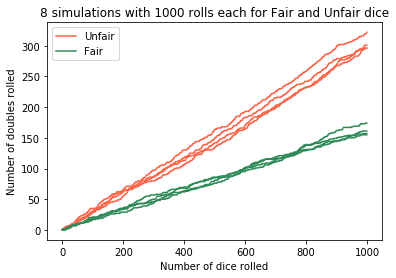

In [106]:
from numpy import cumsum, ones
def loaded_die():
    return np.random.choice(np.arange(1,7), p=[0.1, .1, .1, .1,.1, .5],size=1000)
def fair_die():
    return np.random.choice(np.arange(1,7), size=1000)

def sim_loaded():
    die_1=loaded_die()
    die_2=loaded_die()
    double=die_1==die_2
    double=cumsum(double)
    return double
def sim_fair():
    die_1=fair_die()
    die_2=fair_die()
    double=die_1==die_2
    double=cumsum(double)
    return double

sim_L1=sim_loaded()
sim_L2=sim_loaded()
sim_L3=sim_loaded()
sim_L4=sim_loaded()

sim_F1=sim_fair();
sim_F2=sim_fair();
sim_F3=sim_fair();
sim_F4=sim_fair();
trials={"trail 1": sim_L1,"trail 2": sim_L2, "trail 3": sim_L3, "trail 4": sim_L4 }
loaded_trails=pd.DataFrame(data=trials)
trials={"trail 1": sim_F1,"trail 2": sim_F2, "trail 3": sim_F3, "trail 4": sim_F4 }
fair_trails=pd.DataFrame(data=trials)
fig, ax=plt.subplots()
ax.plot(loaded_trails, label = "Unfair", color="tomato");
ax.plot(fair_trails, label = "Fair", color="seagreen");
leg=ax.legend(["Unfair", "_", "_","_","Fair"]);
ax.set_xlabel("Number of dice rolled");
ax.set_ylabel("Number of doubles rolled");
ax.set_title("8 simulations with 1000 rolls each for Fair and Unfair dice");

***
<a/ id='p2'></a>
[Back to top](#top)

### [25 points] Problem 2

Sonic and Amy are two average hedgehogs who have to run around campus every day for classes and hobbies. When they leave the Engineering Center (E) from their Data Science class, they like to go to 5 other places on campus: the Gym ($G~$) to exercise, the Library ($L~$) to learn, the Hill ($H~$) to grab a sandwich, Weathertech Cafe ($W~$) for a pizza, and the mountains ($M~$) to frolic with their marmot friends.

Here are some rules governing their movements throughout the fair city of Boulder:
* When Sonic and/or Amy is leaving one location, they randomly select one of the available adjacent locations, with equal probability.
* This includes back-tracking, but note that to return to their original location would require 2 moves.
* Assume that all moves require the same amount of time.
* They are also not allowed to stay put; they always must move to some *other* adjacent location.
* Sonic and Amy also act **independently** of one another. That is, the probability that Sonic goes from one place to another is independent of Amy's movements.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/sonic_and_amy_statespace.png" style="width: 300px;"/>

**Part A**: Amy is currently at the Gym and she has worked up quite an appetite! She wants to go to either the Hill or the Weathertech Cafe, and is soooooooo hungry that she must land on exactly the $H$ or $W$ node in exactly one or two moves. Compute (by hand) the probability that Amy ends up at the the Hill ($H$) or the Weathertech Cafe ($W$) in exactly one or two moves, given that she is starting from the Gym ($G$). 

The probaility to get to H or W starting from G are

$$G->H=\frac{1}{3}, G->L->H=\frac{1}{12}, G->L->W=\frac{1}{12}, G->E->W=\frac{1}{9} $$ so the total probablity then equals $$P_{tot}=\frac{1}{3}+\frac{2}{12}+\frac{1}{9}=\frac{11}{18}$$

**Part B**: Suppose that Amy is at the Gym and Sonic is working late at the Engineering Center. Later, they both leave and wander around, randomly and independently of one another, as described above.
1. What is the probability that they run into each other in the same location on the first location visited?  
2. Given their two initial locations, what is the probability that they meet at the Hill after 2 moves?

**B1:** There is only one place both Amy and Sonic can meet in one move is the libray. The chance that Amy will go to with Libary is $\frac{1}{3}$ and Sonic chance to go to Libary is also $\frac{1}{3}$ so the chance that Amy and Sonic both go to the Libary is $$\frac{1}{3}*\frac{1}{3}=\frac{1}{9}$$
**B2:** The probablity Amy and Sonic both go to this hill is $\frac{1}{144}$ since the probability of Amy go to the hill is $G->L->H=\frac{1}{3}*\frac{1}{4}=\frac{1}{12}$ and Sonic's probability is $E->L->H=\frac{1}{3}*\frac{1}{4}=\frac{1}{12}$. The second option is that Sonic goes $E->G->H=\frac{1}{3}*\frac{1}{3}=\frac{1}{9}$ and Amy goes $G->L->H=\frac{1}{3}*\frac{1}{4}=\frac{1}{12}$ which give a probablity of $\frac{1}{108}$ therefore, the total chance both of them will meet at the hill is $\frac{1}{144}+\frac{1}{108}\approx.0162$

**Part C**: Write a simulation to confirm that your by-hand calculations in **Parts A** and **B** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Parts A** and **B**.

In [107]:
graph = { "M" : ["H"],
          "H" : ["G", "L", "M"],
          "L" : ["H", "G", "W", "E"],
          "G" : ["H","L","E"],
          "E" : ["G", "L","W"],
          "W" : ["L","E"]
        }
def Amy_at_hill(n):
    loc_Amy = 'G'
    food_counter=0;
    for i in range(0,n):
        place=np.random.choice(graph[loc_Amy])
        if place=='H':
            food_counter+=1
            continue
        else:
            place=np.random.choice(graph[place])
            if place=='H' or place=='W':
                food_counter+=1
    food_percent=food_counter/n
    return food_percent
        
print(Amy_at_hill(10000), "11/18 is", 11/18)

def meet_onemove(n):
    loc_Amy='G'
    loc_Sonic='E'
    meet_counter=0;
    for i in range(0,n):
        newloc_Amy=np.random.choice(graph[loc_Amy])
        newloc_Sonic=np.random.choice(graph[loc_Sonic])
        if newloc_Amy==newloc_Sonic:
            meet_counter+=1;
    return meet_counter/n
print("Simulation shows that the probability that Amy and Sonic meet is", meet_onemove(10000), "and the \
proability calculated is 1/9=", 1/9)

def meet_2moves(n):
    loc_Amy='G'
    loc_Sonic='E'
    meet_counter=0;
    for i in range(0,n):
        newloc_Amy=np.random.choice(graph[loc_Amy])
        newloc_Sonic=np.random.choice(graph[loc_Sonic])
        newloc_Amy=np.random.choice(graph[newloc_Amy])
        newloc_Sonic=np.random.choice(graph[newloc_Sonic])
        if newloc_Amy=='H' and newloc_Sonic=='H':
            meet_counter+=1;
    return meet_counter/n
print("Simulation shows that the probability that Amy and Sonic meet in 2 moves is", meet_2moves(10000), "and the \
proability calculated is .0162")

0.6174 11/18 is 0.6111111111111112
Simulation shows that the probability that Amy and Sonic meet is 0.1099 and the proability calculated is 1/9= 0.1111111111111111
Simulation shows that the probability that Amy and Sonic meet in 2 moves is 0.0136 and the proability calculated is .0162


**Part D:** Use your simulation from Part C, possibly with some modification, to estimate the **long-run proportion of time that the hedgehogs spend in the mountains**. You can estimate this using the following technique:
* walk a hedgehog around the graph for a very large number of steps (at least 100,000 steps), 
* keep track of which location the hedgehog is at, at each step, then
* the proportion of their time spent at any given location may be estimated as the number of times they are at the Mountains node ($M$), divided by the total number of steps.

You may be left wondering: Where should I start my hedgehog? That is very weird question, but totally valid here! It turns out that **it should not matter** where you start the hedgehog. Verify this by making your estimate from three different starting locations. Be sure to include some commentary in Markdown to state your answer for the long-run proportion of time that the hedgehogs spend in the mountains, and comment on whether it appears to depend on the initial location.

In [108]:
def mountaintime(n,location):
    m_counter=0;
    for i in range(0,n):
        location=np.random.choice(graph[location])
        if location=='M':
            m_counter+=1
    m_percent=m_counter/n
    return m_percent
location_array=["M", "H", "G"]
mountains=[]
for i in range(0,3):
    mountains.append(mountaintime(100000,location_array[i]))
    print("The hedgehog is on the mountain", mountains[i]*100,"% of the time when it starts at",
         location_array[i])

The hedgehog is on the mountain 6.279999999999999 % of the time when it starts at M
The hedgehog is on the mountain 6.091 % of the time when it starts at H
The hedgehog is on the mountain 6.248 % of the time when it starts at G


After looking at the probility of the hedgehog being in the mountain after 100,000 different steps. The intial place where we place our hedgehog does not seem to change the overall probablity our hedgehog staying in the mountains. This is due to the fact that after 100,000 different places the our intial spot will impact the overall percentage very slightly.

***
<a/ id='p3'></a>
[Back to top](#top)

### [20 points] Problem 3  

After years of Computer Science Jedi training, Tony has attained the rank of Master is training two aspiring young apprentices: Nick and Courtney. For their training and Tony’s amusement, Nick and Courtney are having a lightsaber duel with the following rules:
* The duel is composed of a number of rounds.
* Each round consists of Nick trying to strike Courtney with his lightsaber, then Courtney trying to strike Nick with her lightsaber.
* If Nick strikes Courtney, then he is awarded a point. Similarly, if Courtney strikes Nick, then she is also awarded a point.
* If a round ends in a tie (i.e., either both strike each other or both miss), then Nick and Courtney proceed to another round. If a round ends with one apprentice scoring a point but the other does not, then the apprentice who scored a point wins the duel.

Let $C$ be the event that "Courtney wins the duel", $E$ be the event that "the duel ends after the first round of lightsaber strikes", and $R$ be the event that "the duel continues after the first round of lightsaber strikes".  Suppose that the result of any given lightsaber strike is independent of the other strikes, Courtney successfully lands her lightsaber strikes with probability $p$, and Nick lands his strikes with probability $q$.

**Part A**: The duel will continue until Courtney or Nick wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual lightsaber strikes by $H$ for a hit and $M$ for a miss, and assume that Courtney has the first strike in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds, followed by "..." to show that you have established a pattern.

$\Omega$=[HM,HHHM,HHMH,MH,MMHM,MMMH,...]

**Part B**: Determine $P(C \mid E)$ in terms of $p$ and $q$.

$$P(C \mid E)=\frac{p(1-q)}{(1-p)(q)+(1-q)(p)}$$

**Part C**: Explain in words why events $C$ and $R$ should be independent. 

2 outcomes are independent when the outcome of one event doesn't impact the outcome of the 2nd event. In this situation given $R$ is the event where the duel continues after the first round and given that each of Courtney's strike is independent of her other strikes. That means the probability that Courteny's strikes don't impact the probility that R occurs. Following the same thread of logic, we can then assume that the event R won't impact wheather Courtney will strike first and thus, whether she wins the duel.

**Part D**: Use the Law of Total Probability to show that $P(C) = p(1-q) + (2pq - p - q +1) P(C \mid R)$. 

$P(C)=P(C \mid E)*P(E) + P(C \mid R)*P(R)$ 
<br>
$P(C)=p(1-q)+P(C \mid R)((1-p)(1-q)+pq)$
<br>
$P(C)=p(1-q)+(1-p-q+2pq)P(C \mid R)$
<br>
$P(C)=p(1-q)+(2pq-q-p+1)P(C \mid R)$
<br>
Therefore proven

**Part E**: Use **Part D** and the fact from **Part C** that events $C$ and $R$ are independent to determine $P(C)$ in terms of $p$ and $q$. 

Using the Law of total probability we get $(1-p)(q)+(1-q)(p)$ as the total probability of either Courtney or Nick strking. 
<br>
Expanding it out, we get $(1-p)(q)+(1-q)(p)=q+p-2pq$ Now we need to show that $P(C)=P(C \mid R)$
<br>
$P(C)=p(1-q)+(2pq-q-p+1)P(C \mid R)$
<br>
$=p(1-q)+(2pq-q-p+1)P(C)$
<br>
$(1-(1-p-q+2pq))*P(C)=p(1-q)$
<br>
$(q+p-2pq))*P(C)=p(1-q)$
<br>
$P(C)=\frac{p(1-q)}{q+p-2pq}$
<br>
Which is the same as the answer in Part B therefore proven

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

Part B and Part E have the same answer because of the events $P(C)$ and $P(C \mid E)$ are independent of one another.

**Part G**: Explain the significance of the solution technique for $P(C)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(C)$ directly?  Can we always use such techniques?  What assumption did we need to make in order to use this solution approach?

The significance of this solution is that intially we would have assumed that events E and R could effect the proability of $P(C)$ however, by working out the problems from above we now know that $P(C)$ is actually independent of of E and R. Law of total probability can only be used when there is information on how often something occurs and how often it doesn't. The assumptions we made in order to find the solution is that events C and R are independent.

***
<a/ id='p4'></a>
[Back to top](#top)

### [25 points] Problem 4

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of <a href="https://en.wikipedia.org/wiki/Monopoly_(game)">Monopoly</a>).  The game consists of a round board with 40 "squares" numbered from $0$ to $39$, where squares $0$ and would-be $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 2, 7, 17, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect \$50 or \$100, or pay the bank \$25 or \$100.  There is always an equal probability associated with each of these possible cards.

<p> </p>

- Square 20 is **Free Parking**. If a player lands on Square 20, then they are awarded a Free Parking Bonus of \$500. This should be a generic input variable to your `miniopoly_turn` function called `bonus`, so you can modify it later. But, the default value for `bonus` should be \$500.

<p> </p>

- Square 30 is **Go To Jail**. (So if a player has landed on Square 30, then you know they have been to jail.)

<p> </p>

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values), then the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles, then she pays the bank \$20 and remains in **Jail** 
    
<p> </p>

- If the player passes or lands on **GO** (square 0) she collects \$200. 

<p> </p>

- If the player lands on any other square not mentioned above, she pays the bank an amount equal to the square's number (e.g. if she lands on Square 29 she pays the bank \$29). 

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends.

See [here](http://www.cs.colorado.edu/~tonyewong/home/resources/miniopoly_example.png) for an example of the Miniopoly board layout.

<br>

**Part A**: Complete the function `miniopoly_turn` below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves and the amount of the Free Parking (Square 20) bonus, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.

**Warning:** This function will be auto-graded, so do **not** change the form of the function inputs/outputs (API).

In [109]:
# GIVEN code - do not change the inputs/outputs!

def jail(state,cash):
    die1=np.random.choice(np.arange(1,7))
    die2=np.random.choice(np.arange(1,7))
    double=die1==die2
    if double==True:
        state+=(die1+die2)
    else:
        cash=cash-20
    return state,cash
def draw(cash):
    money=[50,100,-25,-100]
    cash= cash+np.random.choice(money)
    return cash
def roll(state):
    die1=np.random.choice(np.arange(1,7))
    die2=np.random.choice(np.arange(1,7))
    total=die1+die2
    state+=total
    return state

def miniopoly_turn(state, cash, bonus=500):
    ##Check if user is in jail
    if state==30:
        tmp=state
        state,cash=jail(state,cash)
        if state!=tmp:
            if state>=40:
                cash+=200
                state=state-40
            if state==20:
                cash+=bonus
            if state==2 or state==7 or state==17 or state==22 or state==33 or state==36:
                cash=draw(cash)
            else:
                cash=cash-state
    else:
        state=roll(state)
        if state>=40:
            cash+=200
            state=state-40
        if state==20:
            cash+=bonus
        if state==2 or state==7 or state==17 or state==22 or state==33 or state==36:
            cash=draw(cash)
        else:
            cash=cash-state
    if cash<0:
        cash=0
        
    return state, cash

**Part B**: Use your function from **Part A** to simulate at least 5000 games of Miniopoly for 20 turns, 40 turns and 60 turns, and make a **density** histogram of the player's cash at the end of the game under all 3 scenarios for number of turns. The histogram box faces should be slightly transparent, so as to be able to tell the 3 game-length scenarios apart. For all three histograms, use bins of width \$250, starting at 0 on the left and extending as far to the right as needed. As always, be sure to label your axes and include an informative legend.

Comment on how the histogram shape changes as the game progresses. Namely, how does the length of the game affect the distribution of players' cash? How many modes are there, and why?

()

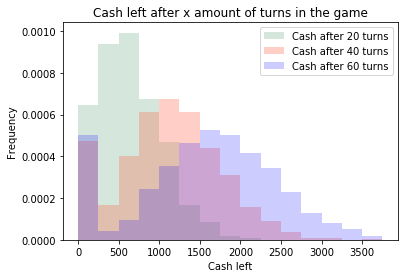

In [110]:
def game(amount, turn1,turn2,turn3):
    cashend_20=[]
    cashend_40=[]
    cashend_60=[]
    for i in range (0,amount):
        state20=0
        state40=0
        state60=0
        cash_20=200
        cash_40=200
        cash_60=200
        for j in range(0,turn1):
            state20,cash_20=miniopoly_turn(state20, cash_20, bonus=500)
            if cash_20==0:
                break
        cashend_20.append(cash_20)
        for j in range(0,turn2):
            state40,cash_40=miniopoly_turn(state40, cash_40, bonus=500)
            if cash_40==0:
                break
        cashend_40.append(cash_40)
        for j in range(0,turn3):
            state60,cash_60=miniopoly_turn(state60, cash_60, bonus=500)
            if cash_60==0:
                break
        cashend_60.append(cash_60)
    my_bins = range(0,4000,250)
    fig, ax = plt.subplots(1,1)
    ax.hist(cashend_20, color="seagreen", alpha=.2, density=True, bins=my_bins)
    ax.hist(cashend_40, color="tomato", alpha=.3, density=True, bins=my_bins)
    ax.hist(cashend_60, color="Blue", alpha=.2, density=True, bins=my_bins)
    ax.legend(["Cash after 20 turns", "Cash after 40 turns","Cash after 60 turns"])
    ax.set_title("Cash left after x amount of turns in the game")
    ax.set_xlabel("Cash left")
    ax.set_ylabel("Frequency")
    return();

game(5000,20,40,60)

    

As the game goes from 20,40,60 turns we can see there is a normal distribution that continues to shift further to the right. In addition to that, there is a high amount of people that went bankrupt in each histogram, causing a another mean to occur from 0 to 250. This creates a bimodal distibution where the is a mean caused a standard normal curve and another mean caused by the going bankrupt.

**Part C**: Use your code from **Parts A and B** to estimate the probability that a player goes bankrupt in the first 40 turns of the game. Use at least 10,000 simulations.

Then, run a set of at least 10,000 simulations to estimate the probability that a player goes bankrupt in the first 40 turns of the game if you remove the Free Parking Bonus of \$500, so if a player lands on Square 20, nothing happens. Here, you should be able to easily adapt your calls to the `miniopoly_turn` function to remove the Free Parking Bonus.

A common criticism of the Free Parking Bonus is that it makes Monopoly games take much longer to play. Do your results support this claim? How does the Free Parking rule seem to affect the Miniopoly games? Fully explain and justify your answers.

Do you like the Free Parking bonus rule?

How often you go bankrupt in 10000 games without free parking is 1435 which is 
 14.35 % of the time
How often you go bankrupt in 10000 games with free parking at 500 is 1220 which is 
 12.2 % of the time


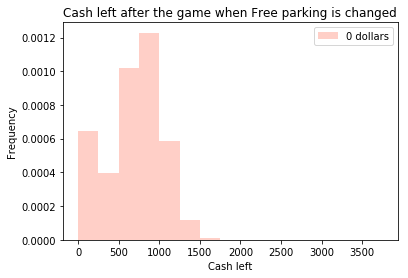

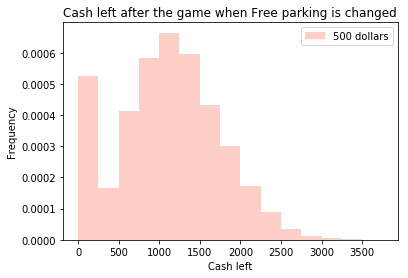

In [111]:
def game40(amount, bonus):
    cashend_40=[]
    for i in range (0,amount):
        state40=0
        cash_40=200
        for j in range(0,40):
            state40,cash_40=miniopoly_turn(state40, cash_40, bonus)
            if cash_40==0:
                break
        cashend_40.append(cash_40)
    my_bins = range(0,4000,250)
    bonus_string=str(bonus)+" "+"dollars"
    fig, ax = plt.subplots(1,1)
    ax.hist(cashend_40, color="tomato", alpha=.3, density=True, bins=my_bins)
    ax.legend([bonus_string])
    ax.set_title("Cash left after the game when Free parking is changed")
    ax.set_xlabel("Cash left")
    ax.set_ylabel("Frequency")
    return(cashend_40);
cashremaining=game40(10000,0)
##Calculate the probability that you go bankrupt with and without free parking
cash_nopark=np.count_nonzero(cashremaining)
bankrupt=10000-cash_nopark
print("How often you go bankrupt in 10000 games without free parking is", bankrupt, "which is \n",
      (bankrupt/10000)*100,"% of the time")
cash=game40(10000,500)
cash_park=np.count_nonzero(cash)
bankrupt=10000-cash_park
print("How often you go bankrupt in 10000 games with free parking at 500 is", bankrupt, "which is \n",
      (bankrupt/10000)*100,"% of the time")

      

Based on my data, Free parking will not cause the player to become more likely to become bankrupt as shown above.  However, people on average will have much less money in the game by the end of the 40 turns and games without free parking could end faster after x amount of turns when compared to games with free parking.

**Part D**: (Note: For the rest of this problem, use a Free Parking Bonus of \$500.)

Use your code from the previous parts to estimate the probability that a player ***does not*** go bankrupt in the first 40 turns _given_ that they have landed on Free Parking at least once.  Is a player more or less likely to go bankrupt if they've landed on Free Parking? Use at least 10,000 simulations of 40-turn games, and keep at least 4 decimal places in your answer.

How often a player doesn't go bankrupt in 5631 games when you get free parking at least once is 5630 which is: 
 99.98224116497958 % of the time


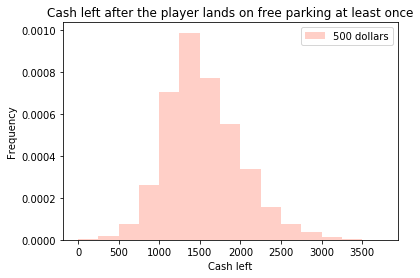

In [113]:
def jail(state,cash):
    die1=np.random.choice(np.arange(1,7))
    die2=np.random.choice(np.arange(1,7))
    double=die1==die2
    if double==True:
        state+=(die1+die2)
    else:
        cash=cash-20
    return state,cash
def draw(cash):
    money=[50,100,-25,-100]
    cash= cash+np.random.choice(money)
    return cash
def roll(state):
    die1=np.random.choice(np.arange(1,7))
    die2=np.random.choice(np.arange(1,7))
    total=die1+die2
    state+=total
    return state

def miniopoly_turn(state, cash, fp_count, bonus=500):
    ##Create a counter to check how many times palyer landed on free parking
    ##Check if user is in jail
    if state==30:
        tmp=state
        state,cash=jail(state,cash)
        if state!=tmp:
            if state>=40:
                cash+=200
                state=state-40
            if state==20:
                fp_count+=1
                cash+=bonus
            if state==2 or state==7 or state==17 or state==22 or state==33 or state==36:
                cash=draw(cash)
            else:
                cash=cash-state
    else:
        state=roll(state)
        if state>=40:
            cash+=200
            state=state-40
        if state==20:
            fp_count+=1
            cash+=bonus
        elif state==2 or state==7 or state==17 or state==22 or state==33 or state==36:
            cash=draw(cash)
        else:
            cash=cash-state
    if cash<0:
        cash=0
        
    return state, cash, fp_count
def game40(amount, bonus):
    cashend_40=[]
    for i in range (0,amount):
        fp_count=0
        state40=0
        cash_40=200
        for j in range(0,40):
            state40,cash_40,fp_count=miniopoly_turn(state40, cash_40, fp_count, bonus)
            if cash_40==0:
                break
        if fp_count >= 1:
            cashend_40.append(cash_40)
    my_bins = range(0,4000,250)
    bonus_string=str(bonus)+" "+"dollars"
    fig, ax = plt.subplots(1,1)
    ax.hist(cashend_40, color="tomato", alpha=.3, density=True, bins=my_bins)
    ax.legend([bonus_string])
    ax.set_title("Cash left after the player lands on free parking at least once")
    ax.set_xlabel("Cash left")
    ax.set_ylabel("Frequency")
    return(cashend_40);
cashremaining=game40(10000,500)
##Calculate the probability that you don't go bankrupt
total=len(cashremaining)
cash=np.count_nonzero(cashremaining)
print("How often a player doesn't go bankrupt in",total,"games when you get free parking at least once is", 
      cash, "which is: \n", (cash/total)*100,"% of the time")


**Part E**: Use your code from the previous parts to estimate the probability (either directly or using Bayes' Rule) that a player has landed on Free Parking at least once, given that the player did not go bankrupt in the first 40 turns.

$$P(FP \mid NB)= \frac{P(NB \mid FP)(P(FP)}{P(NB \mid FP)(P(FP)+P(NB \mid NO_{FP})(P(NO_{FP})}$$
<br>
Where $P(NB \mid FP)=.99982$, $P(FP)=\frac{1}{40}$, $P(NO_{FP})=\frac{39}{40}$, $P(NB \mid NO_{FP})=.8565$
<br>
$$P(FP \mid NB)=2.94\%$$
This is about .5% increase in likelyhood when compared to just $P(FP)=2.5\%$ 
